In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

output_dir = '/home/maria/AllenData'
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
session=cache.get_session_data(746083955)
lfp = session.get_lfp(760647907)
len(lfp)

lfp_slice = lfp[1000:1100]

/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning

Text(0, 0.5, 'LFP (V)')

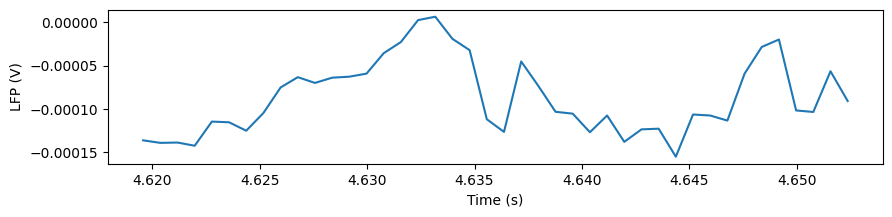

In [4]:
len(lfp)

lfp_slice = lfp[1000:1042]
plt.figure(figsize=(10,2))
_ = plt.plot(lfp_slice.time, lfp_slice.sel(channel=lfp_slice.channel[0]))
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')

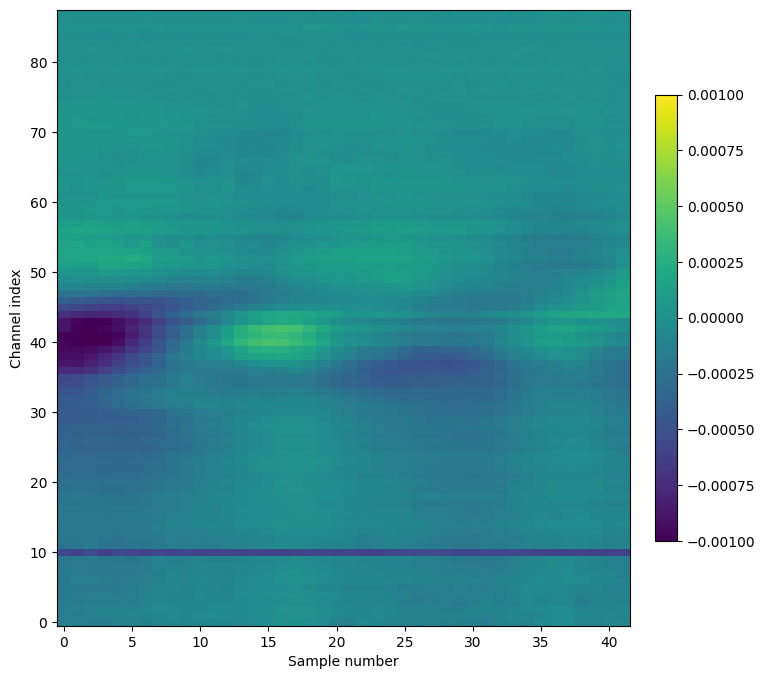

In [5]:

plt.figure(figsize=(8,8))
im = plt.imshow(lfp_slice.T,aspect='auto',origin='lower',vmin=-1e-3, vmax=1e-3)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

In [10]:
!pip install torch

  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 19.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 20.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 19.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 20.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 19.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 20.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# Setup the data paths and load session data
output_dir = '/home/maria/AllenData'
manifest_path = os.path.join(output_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

# Load the session and LFP data
session = cache.get_session_data(746083955)
lfp = session.get_lfp(760647907)

# Sample 10000 random 100-length slices from the LFP data
num_slices = 10000
slice_length = 100
lfp_array = lfp#['data'].values  # Convert to numpy array for easy slicing

# Ensure the slices do not exceed the available data
max_start_idx = len(lfp_array) - slice_length
random_start_indices = np.random.randint(0, max_start_idx, size=num_slices)

# Generate the 100-length slices
lfp_slices = np.array([lfp_array[i:i + slice_length] for i in random_start_indices])

# Define a custom dataset
class LFPSliceDataset(Dataset):
    def __init__(self, lfp_slices):
        self.lfp_slices = torch.tensor(lfp_slices, dtype=torch.float32)

    def __len__(self):
        return len(self.lfp_slices)

    def __getitem__(self, idx):
        return self.lfp_slices[idx]

# Create the dataset and dataloader
lfp_dataset = LFPSliceDataset(lfp_slices)
data_loader = DataLoader(lfp_dataset, batch_size=32, shuffle=True)

# Now, data_loader is ready to be used for training your autoencoder model.


/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/home/maria/NeuroGarage/.venv/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1

(12097852, 88)
(100, 88)
tensor([[[ 1.4625e-05,  4.4265e-05,  9.8670e-05,  ..., -8.9700e-06,
           2.0865e-05, -9.9450e-06],
         [ 4.7775e-05,  8.4825e-05,  7.4880e-05,  ..., -1.0140e-05,
           1.7550e-05, -1.1505e-05],
         [ 8.5215e-05,  8.9115e-05,  7.2540e-05,  ..., -5.6550e-06,
           2.0865e-05, -1.7745e-05],
         ...,
         [-1.1115e-04, -1.0530e-04, -8.6190e-05,  ..., -4.0950e-06,
           1.6380e-05, -3.3540e-05],
         [-6.4155e-05, -7.4100e-05, -5.4990e-05,  ...,  0.0000e+00,
           2.8080e-05, -1.9305e-05],
         [ 1.3260e-05,  1.6575e-05, -1.8525e-05,  ..., -1.0335e-05,
           2.5350e-05, -5.6550e-06]],

        [[ 5.4795e-05,  4.8360e-05,  1.2480e-05,  ..., -1.1895e-05,
          -7.8000e-06,  1.5990e-05],
         [ 7.1565e-05,  6.1035e-05,  2.8860e-05,  ..., -3.3150e-06,
           6.8250e-06,  1.5210e-05],
         [ 1.6965e-05,  2.6325e-05, -1.4235e-05,  ...,  5.8500e-07,
          -2.1450e-06,  1.8525e-05],
         ...,


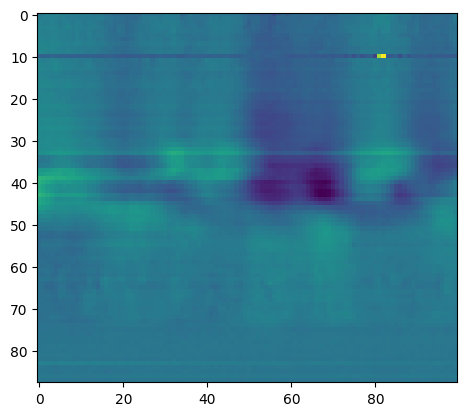

In [80]:
print(lfp_array.shape)
arr=next(iter(data_loader))
plt.imshow(arr.numpy()[0].T)
print(arr.numpy()[0].shape)
print(arr)

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1),  # Output: (16, 50, 44)
            nn.ReLU(True),
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=2, padding=1),   # Output: (8, 25, 22)
            nn.ReLU(True)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (16, 50, 44)
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1)   # Output: (1, 100, 88)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = ConvAutoencoder()

# If you have a GPU, move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Example of training loop (assuming data_loader is already defined)
num_epochs = 20

for epoch in range(num_epochs):
    for data in data_loader:
        # Move data to the same device as the model
        data = data.unsqueeze(1).to(device)  # Add channel dimension for Conv2D
        
        # Forward pass
        output = model(data)
        loss = criterion(output, data)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")


Epoch [1/20], Loss: 0.0000
Epoch [2/20], Loss: 0.0000
Epoch [3/20], Loss: 0.0000
Epoch [4/20], Loss: 0.0000
Epoch [5/20], Loss: 0.0000
Epoch [6/20], Loss: 0.0000
Epoch [7/20], Loss: 0.0000
Epoch [8/20], Loss: 0.0000
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0000
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0000
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0000
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Training complete!


In [81]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # Encoder
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1),  # Output: (16, 50, 44)
            nn.ReLU(True),
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=2, padding=1),   # Output: (8, 25, 22)
            nn.ReLU(True)
        )
        
        # Linear layers in Encoder
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8 * 25 * 22, 256)  # Adjust output size based on conv layer output
        self.fc2 = nn.Linear(256, 64)  # Latent space size
        
        # Decoder Linear layers
        self.fc3 = nn.Linear(64, 256)  # Project latent space to 256 features
        self.fc4 = nn.Linear(256, 8 * 25 * 22)  # Project to the shape before transposed conv
        
        self.unflatten = nn.Unflatten(1, (8, 25, 22))  # Convert flat vector back to tensor shape
        
        # Decoder
        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (16, 50, 44)
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1)   # Output: (1, 100, 88)
        )
        
    def forward(self, x):
        # Encoder
        x = self.encoder_conv(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        # Latent space to Decoder
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.unflatten(x)
        
        # Decoder
        x = self.decoder_conv(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = ConvAutoencoder()

# If you have a GPU, move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Example of training loop (assuming data_loader is already defined)
num_epochs = 20

for epoch in range(num_epochs):
    for data in data_loader:
        # Move data to the same device as the model
        data = data.unsqueeze(1).to(device)*10**5  # Add channel dimension for Conv2D
        
        # Forward pass
        output = model(data)
        loss = criterion(output, data)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

Epoch [1/20], Loss: 57.8225
Epoch [2/20], Loss: 50.8969
Epoch [3/20], Loss: 35.0722
Epoch [4/20], Loss: 34.8512
Epoch [5/20], Loss: 24.5720
Epoch [6/20], Loss: 24.4521
Epoch [7/20], Loss: 29.5504
Epoch [8/20], Loss: 27.7019
Epoch [9/20], Loss: 30.3925
Epoch [10/20], Loss: 29.2749
Epoch [11/20], Loss: 24.0152
Epoch [12/20], Loss: 23.2312
Epoch [13/20], Loss: 24.3979
Epoch [14/20], Loss: 22.6978
Epoch [15/20], Loss: 21.5904
Epoch [16/20], Loss: 24.2653
Epoch [17/20], Loss: 24.8922
Epoch [18/20], Loss: 22.7325
Epoch [19/20], Loss: 23.3313
Epoch [20/20], Loss: 21.3790
Training complete!


In [85]:
import torch
import matplotlib.pyplot as plt

# Function to visualize the original and reconstructed LFP data
def visualize_reconstruction(model, data_loader, device):
    # Set the model to evaluation mode
    model.eval()
    
    with torch.no_grad():
        # Get a batch of test data
        for data in data_loader:
            data = data.unsqueeze(1).to(device)  # Add channel dimension for Conv2D
            output = model(data)
            
            # Move data and output back to CPU and convert to numpy
            data = data.cpu().numpy()
            output = output.cpu().numpy()
            
            # Visualize the first sample in the batch
            original = data[0, 0, :, :]  # Remove batch and channel dimension
            reconstructed = output[0, 0, :, :]  # Remove batch and channel dimension
            
            # Plot original and reconstructed images
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(original.T, aspect='auto', cmap='bwr')
            axs[0].set_title('Original')
            axs[0].axis('off')
            
            axs[1].imshow(reconstructed.T, aspect='auto', cmap='bwr')
            axs[1].set_title('Reconstructed')
            axs[1].axis('off')
            
            plt.show()
            
            # Break after one batch for demonstration purposes
            break

# Example: Assuming `test_loader` is your DataLoader for test data
# and `model` is your trained ConvAutoencoder

# Load your trained model (if not already loaded)
# model.load_state_dict(torch.load('path_to_saved_model.pth'))

# Prepare test data loader
    # Example: `test_loader` should be defined similaly to `data_loader`, but for test data

# Call the visualization function
visualize_reconstruction(model, data_loader, device)


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [126]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearAutoencoder(nn.Module):
    def __init__(self):
        super(LinearAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),  # Flatten the input
            nn.Linear(100 * 88, 45),  # Input size: 100*88, Output size: 512
            nn.ReLU(True),
            nn.Linear(45, 128),  # Intermediate size: 128
            nn.ReLU(True),
            nn.Linear(128, 32)  # Latent space size: 32
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),  # Latent space size: 32 to 128
            nn.ReLU(True),
            nn.Linear(128, 45),  # Intermediate size: 512
            nn.ReLU(True),
            nn.Linear(45, 100 * 88),  # Output size: 100*88
            nn.Sigmoid(),  # Assuming the data is normalized between 0 and 1
            nn.Unflatten(1, (100, 88))  # Reshape to the original dimensions
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = LinearAutoencoder()

# If you have a GPU, move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Example of training loop (assuming data_loader is already defined)
num_epochs = 100

for epoch in range(num_epochs):
    for data in pca_reconstructed_dataloader:
        # Move data to the same device as the model
        data = data.to(device)*10**5  # Data should already be in shape (batch_size, 100, 88)
        
        # Forward pass
        output = model(data)
        loss = criterion(output, data)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")


Epoch [1/100], Loss: 210.0183
Epoch [2/100], Loss: 182.2998
Epoch [3/100], Loss: 276.7825
Epoch [4/100], Loss: 219.1457
Epoch [5/100], Loss: 233.5371
Epoch [6/100], Loss: 191.2635
Epoch [7/100], Loss: 204.5248
Epoch [8/100], Loss: 211.3001
Epoch [9/100], Loss: 204.3174
Epoch [10/100], Loss: 173.3321
Epoch [11/100], Loss: 178.0492
Epoch [12/100], Loss: 242.3207
Epoch [13/100], Loss: 340.9045
Epoch [14/100], Loss: 217.0194
Epoch [15/100], Loss: 206.7838
Epoch [16/100], Loss: 259.2895
Epoch [17/100], Loss: 189.1105
Epoch [18/100], Loss: 147.0625
Epoch [19/100], Loss: 285.5318
Epoch [20/100], Loss: 222.4795
Epoch [21/100], Loss: 262.3921
Epoch [22/100], Loss: 213.3378
Epoch [23/100], Loss: 206.1112
Epoch [24/100], Loss: 223.8484
Epoch [25/100], Loss: 187.5842
Epoch [26/100], Loss: 220.4704
Epoch [27/100], Loss: 282.6091
Epoch [28/100], Loss: 213.3799
Epoch [29/100], Loss: 290.8769
Epoch [30/100], Loss: 412.8563
Epoch [31/100], Loss: 202.5686
Epoch [32/100], Loss: 235.1159
Epoch [33/100], L

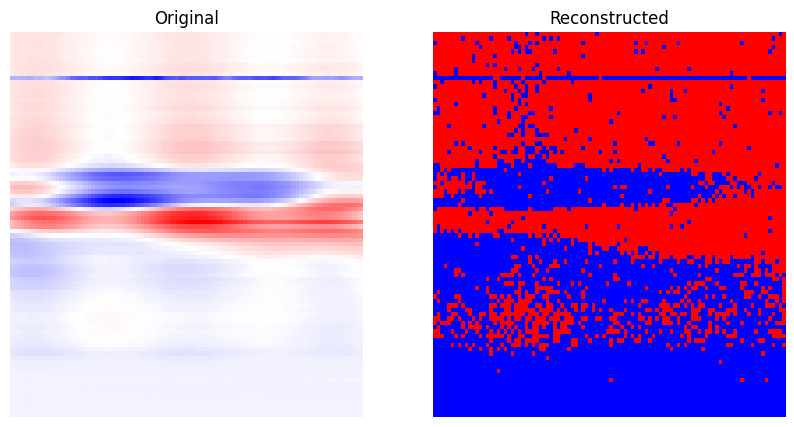

In [175]:
import torch
import matplotlib.pyplot as plt

# Function to visualize the original and reconstructed LFP data
def visualize_reconstruction(model, data_loader, device):
    # Set the model to evaluation mode
    model.eval()
    
    with torch.no_grad():
        # Get a batch of test data
        for data in pca_reconstructed_dataloader:
            data = data.to(device)*10**5  # Add channel dimension for Conv2D
            output = model(data)
            
            # Move data and output back to CPU and convert to numpy
            data = data.cpu().numpy()
            output = output.cpu().numpy()
            
            # Visualize the first sample in the batch
            original = data[0, :, :]  # Remove batch and channel dimension
            reconstructed = output[0, :, :]  # Remove batch and channel dimension
            
            # Plot original and reconstructed images
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(original.T, aspect='auto', cmap='bwr')
            axs[0].set_title('Original')
            axs[0].axis('off')
            
            axs[1].imshow(reconstructed.T, aspect='auto', cmap='bwr')
            axs[1].set_title('Reconstructed')
            axs[1].axis('off')
            
            plt.show()
            
            # Break after one batch for demonstration purposes
            break

# Example: Assuming `test_loader` is your DataLoader for test data
# and `model` is your trained ConvAutoencoder

# Load your trained model (if not already loaded)
# model.load_state_dict(torch.load('path_to_saved_model.pth'))

# Prepare test data loader
    # Example: `test_loader` should be defined similaly to `data_loader`, but for test data

# Call the visualization function
visualize_reconstruction(model, data_loader, device)


In [116]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
import numpy as np

# Define a custom Dataset class for PCA-reconstructed data
class PCAReconstructedDataset(Dataset):
    def __init__(self, data, pca):
        """
        Args:
            data (numpy.ndarray): Original data array with shape (num_samples, 100, 88).
            pca (PCA): Fitted PCA object for dimensionality reduction and reconstruction.
        """
        self.data = data
        self.pca = pca
        
        # Flatten the data and apply PCA
        flattened_data = self.data.reshape(len(self.data), -1)
        self.transformed_data = self.pca.transform(flattened_data)
        
        # Reconstruct the data
        reconstructed_flattened = self.pca.inverse_transform(self.transformed_data)
        self.reconstructed_data = reconstructed_flattened.reshape(data.shape)
    
    def __len__(self):
        return len(self.reconstructed_data)
    
    def __getitem__(self, idx):
        return torch.tensor(self.reconstructed_data[idx], dtype=torch.float32)

# Example: Assuming `lfp_data` is your original data with shape (num_samples, 100, 88)
# Replace this with your actual data loading code
lfp_data = lfp_slices  # Replace with your actual data

# Flatten the data
flattened_data = lfp_data.reshape(len(lfp_data), -1)

# Fit PCA
pca = PCA(n_components=10)
pca.fit(flattened_data)

# Create PCA-reconstructed dataset
pca_reconstructed_dataset = PCAReconstructedDataset(lfp_data, pca)

# Create a DataLoader
pca_reconstructed_dataloader = DataLoader(pca_reconstructed_dataset, batch_size=32, shuffle=True)

# Example of using the DataLoader
for batch in pca_reconstructed_dataloader:
    print(batch.shape)  # Should print torch.Size([batch_size, 100, 88])
    break  # Just showing the shape of one batch


torch.Size([32, 100, 88])


In [103]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.6 MB/s eta 0:00:00 0:00:01
